## 선형판별분석법과 이차판별분석법

선형판별분석법(linear discriminant analysis, LDA)과 이차판별분석법(quadratic discriminant analysis, QDA)는 대표적인 확률론적 생성모형이다. 가능도 즉, y의 클래스 값에 따른 x 의 분포에 대한 정보를 먼저 알아낸 후, 베이즈 정리를 사용하여 주어진 x에 대해 y의 확률분포를 찾아낸다.

* ex) y가 0일때 x가 어떻게생겼는지에 대해 공부

### 생성모형

생성모형에서는 베이즈 정리를 사용하여 조건부확률 $p(y=k|x) 을 계산한다.$

$P(y = k \mid x) = \dfrac{P(x \mid y = k)\; P(y = k)}{P(x)}$

분류문제를 풀기 위해서는 각 크랠스 k에 대한 확률을 비교하여 가장 큰 값을 선택한다. 따라서 모든 클래스에 대해 값이 같은 분모 $P(x)$은 굳이 계산하지 않아도 괜찮다.

$P(y=k∣x)∝P(x∣y=k)P(y=k)$

여기에서 사전확률$P(y=k)$는 특별한 정보가 없는 경우, 다음처럼 계산한다.

$P(y = k) \approx \frac{\;\;\;\; y = k \text{인 데이터의 수 } \text{ }\;\;\;\;\;\; }{{\text{ }}\text{    모든 데이터의 수    }\;\;\;\;\;\;\;\;}$

만약 다른 지식이나 정보로 알고 있는 사전확률값이 있다면 그 값을 사용하면 된다.

#### y 에 대한  x 의 조건부확률인 가능도는 다음과 같이 계산한다.

1. $P(x∣y=k)$  가 특정한 확률분포 모형을 따른다고 가정한다. 즉, 확률밀도함수의 형태를 가정한다. -> 정규분포 가정


2. k 번째 클래스에 속하는 학습 데이터  {x1,⋯,xN} 을 사용하여 이 모형의 모수값을 구한다.  ->  $ #mu , #sigma^2 $ 계산


3. 모수값을 알고 있으므로  P(x∣y=k) 의 확률 밀도 함수를 구한 것이다. 즉, 새로운 독립변수 값  x 이 어떤 값이 되더라도  $P(x∣y=k)$ 의 값을 계산할 수 있다. $ -> p(x)$


In [30]:
rv_normal = sp.stats.norm(loc=37.5,scale=0.1)

In [32]:
rv_normal.pdf(37.8)

0.044318484119383855

In [33]:
rv_flu = sp.stats.norm(loc=40,scale=0.2)

In [34]:
rv_flu.pdf(39.9)

1.7603266338214911

#### 이차판별분석법

이차판별분석법에서는 독립변수 x가 실수이고 확률분포가 다변수 정규분포가고 가정한다. 단 x 분포의 위치이와 형태는 클래스에 따라 달라질 수 있다.

$p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)$

__클래스마다 모양이 다르다__ -> y

이 분포들을 알고 있으면 독립변수 x에 대한 y 클래스의 조건부 확률분포는 다음과 같이 베이즈 정리와 전체 확률의 법칙으로 구할 수 있다.

$P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }$

예를 들어  y 가 1, 2, 3 이라는 3개의 클래스를 가지고 각 클래스에서의  x 의 확률분포가 다음과 같은 기대값 및 공분산 행렬을 가진다고 가정하자.

$\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}$

$\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}$

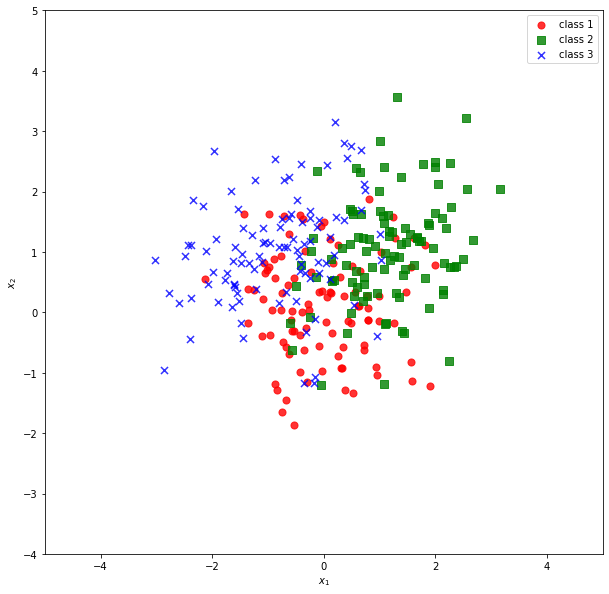

In [36]:
import scipy as sp
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# import scipy.statsmodel
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [50]:
X1_mean = X1.mean(axis=0)

In [43]:
X2.mean(axis=0)

array([1.16303727, 1.03930605])

In [42]:
X3.mean(axis=0)

array([-0.8640604 ,  1.02295794])

In [49]:
X1_cov = np.cov(X1.T)

In [47]:
np.cov(X2.T)

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [48]:
np.cov(X3.T)

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

In [51]:
rv_X1 = sp.stats.norm(loc=X1_mean,scale=X1_cov)

In [57]:
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0),np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0),np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0),np.cov(X3.T))

rv1.pdf([2,-1]),rv2.pdf([2,-1]),rv3.pdf([2,-1])

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

In [10]:
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis

qda =QuadraticDiscriminantAnalysis(store_covariance=True).fit(X,y)

In [11]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [15]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [16]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [17]:
qda.covariance_[1]

array([[0.66534246, 0.21132313],
       [0.21132313, 0.78806006]])

In [18]:
qda.covariance_[2]

array([[0.9351386 , 0.22880955],
       [0.22880955, 0.79142383]])

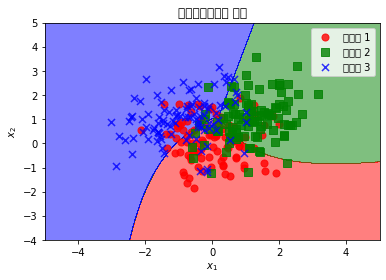

In [22]:
import matplotlib as mpl
import seaborn as sns
import warnings
 
warnings.filterwarnings("ignore")

x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차판별분석법 결과")
plt.legend()
plt.show()


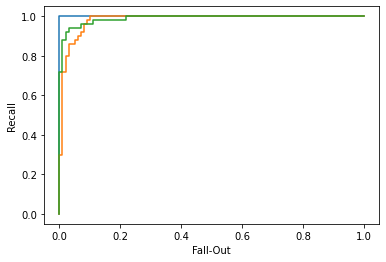

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
# from sklearn import roc_curve
from sklearn.metrics import roc_curve, auc
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0,1,2])
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3


for i in range(3):
    model = GaussianNB().fit(X, y[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(X)[:,1])
    plt.plot(fpr[i],tpr[i])
    
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.show()

In [72]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y= iris.target
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X,y)
y_pred = model.predict(X)

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [70]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

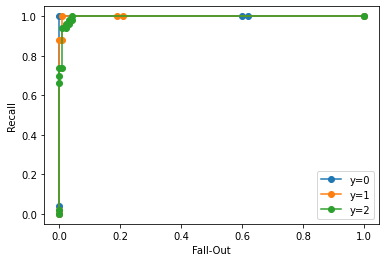

In [76]:
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


y_obe = label_binarize(iris.target, [0,1,2])
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3


for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X, y_obe[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(X)[:,1])
    plt.plot(fpr[i],tpr[i],'o-',label=f"y={i}")
    
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [77]:
########\

# 시그마를 모두 구할 필요있냐? 공통된걸로 쓰자 -> 선형 판별 분석법

### 선형판별 분석법

선형판별분석법에서는 각 Y 클래스에 대한 독립변수 X의 조건부확률분포가 __공통된 공분산 행렬을 가지는__ 다변수 정규분포이라고 가정한다. 즉
$\Sigma_k = \Sigma \;\;\; \text{ for all } k$
이다.

이 때는 조건부확률분포를 다음과 같이 정리할 수 있다.

$\begin{eqnarray}
\log p(x \mid y = k) 
&=& \log \dfrac{1}{(2\pi)^{D/2} |\Sigma|^{1/2}} -  \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} (x-\mu_k)^T \Sigma^{-1} (x-\mu_k) \\
&=& C_0 - \dfrac{1}{2} \left( x^T\Sigma^{-1}x - 2\mu_k^T \Sigma^{-1}x + \mu_k^T \Sigma^{-1}\mu_k \right) \\
&=& C(x)  + \mu_k^T \Sigma^{-1}x - \dfrac{1}{2} \mu_k^T \Sigma^{-1}\mu_k \\
\end{eqnarray}$

$\begin{eqnarray}
p(x \mid y = k) 
&=& C'(x)\exp(w_k^Tx + w_{k0}) \\
\end{eqnarray}$

이 식에서 $C'(x) = \exp C(x)$ 이다.

$\begin{eqnarray}
P(y=k \mid x) 
&=& \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{\sum_l C'(x)\exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{C'(x)\exp(w_k^Tx + w_{k0}) P(y=k)}{C'(x)\sum_l \exp(w_l^Tx + w_{l0})P(y=l) } \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{\sum_l P(y=l) \exp(w_l^Tx + w_{k0})} \\
&=& \dfrac{P(y=k) \exp(w_k^Tx + w_{k0}) }{P(x)} \\
\end{eqnarray}$

이 식에서 $P(x)$ 는 y 클래스 값에 영향을 받지 않는다.

따라서 $\log P(y=k \mid x) = \log P(y=k) + w_k^Tx + w_{k0} - \log{P(x)} = w_k^Tx + C''_k$

모든 클래스 k 에 대한 위와 같은 식이 성립하므로 클래스 $k_1$ 와 클래스 $k_2$의 경계선, 클래스에 대한 확률값이 같아지는 x 위치를 찾으면 다음과 같다.

$w_{k_1}^Tx + C''_{k_1} = w_{k_2}^Tx + C''_{k_2}$
$(w_{k_1} - w_{k_2})^Tx + (C''_{k_1} - C''_{k_2}) = 0$
$w^Tx + C = 0$

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, solver ='svd', store_covariance=True).fit(X,y)

In [24]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [26]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

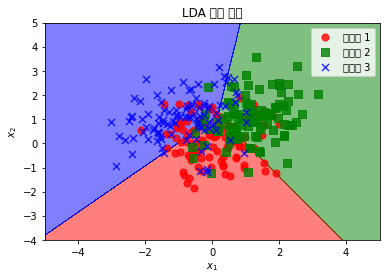

In [27]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA 분석 결과")
plt.show()